# Pré-processamento simples

In [1]:
import nbimporter
import numpy as np
import Convert_NRC as nrc
from header import EmotionAnalysis as ea

Importing Jupyter notebook from Convert_NRC.ipynb
Importing Jupyter notebook from /home/ellen/Projetos/TextMining/header/EmotionAnalysis.ipynb


## Obtenção do documento

In [2]:
filepath = 'books/senhora.txt'

In [3]:
raw = ea.open_file(filepath)

## Pré-processamento

In [4]:
stopwords = ea.get_stopwords()

In [5]:
tokens = ea.tokenize(raw)

In [8]:
negated_tokens = ea.negations(tokens)

In [9]:
no_stop_tokens = ea.remove_stopwords(stopwords, negated_tokens)

In [10]:
filtered_tokens = ea.remove_not_alpha(no_stop_tokens)

In [11]:
text = ea.convert_to_text(tokens)

## Análise do texto

In [12]:
dist = ea.tokens_frequency(filtered_tokens)

In [13]:
ea.info(tokens, filtered_tokens)

quantidade de palavras: 88243
quantidade de palavras após o filtro: 38177
quantidade de palavras únicas: 12230
quantidade de palavras únicas após o filtro: 10167
diversidade léxica: 26.631217748906412


In [14]:
freq = ea.most_frequent(filtered_tokens, dist, 20)
print(f"20 palavras mais frequentes: {freq}")

20 palavras mais frequentes: [('aurélia', 623), ('seixas', 457), ('é', 345), ('moça', 270), ('marido', 216), ('ainda', 168), ('mulher', 167), ('casa', 144), ('fernando', 131), ('havia', 127), ('amor', 121), ('lemos', 111), ('disse', 111), ('senhor', 111), ('alma', 110), ('tempo', 110), ('casamento', 109), ('noite', 109), ('senhora', 102), ('onde', 102)]


### Análise de Emoção

In [15]:
wordList, emotionList = ea.emolex()

In [16]:
emoList = ea.newList(emotionList, filtered_tokens)

In [17]:
emotionCounts = ea.generate_count(wordList, filtered_tokens)

In [18]:
emotionCounts.most_common()

[('positivo', 4344),
 ('confiança', 2545),
 ('negativo', 2357),
 ('antecipação', 1996),
 ('alegria', 1791),
 ('tristeza', 1465),
 ('medo', 1303),
 ('raiva', 1004),
 ('surpresa', 780),
 ('nojo', 748)]

In [19]:
wordCounts = ea.generate_count(emoList, filtered_tokens)

In [20]:
wordCounts.most_common(20)

[('amor', 2178),
 ('moça', 1620),
 ('mãe', 1260),
 ('casamento', 1199),
 ('esperança', 690),
 ('senhor', 666),
 ('doce', 660),
 ('boa', 600),
 ('liberdade', 600),
 ('surpresa', 589),
 ('dinheiro', 539),
 ('corte', 480),
 ('paixão', 462),
 ('segredo', 460),
 ('destino', 456),
 ('deus', 448),
 ('moral', 420),
 ('sorte', 416),
 ('canto', 390),
 ('verdade', 385)]

In [21]:
wordArray = np.asarray(wordCounts.most_common(5))
wordArray = [i[0] for i in wordArray]

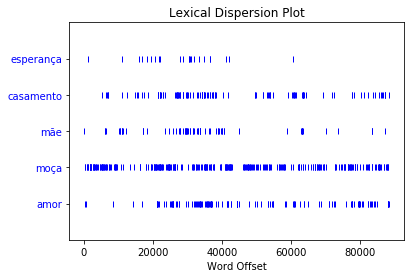

In [23]:
text.dispersion_plot(wordArray)

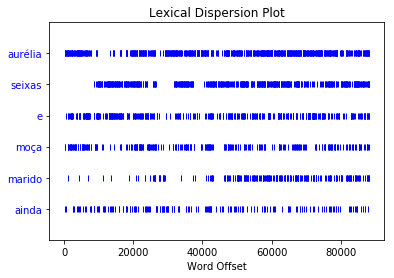

In [24]:
sortedToken = sorted(list(set(filtered_tokens)), key=lambda token: dist[token], reverse=True)
text.dispersion_plot(sortedToken[:6])